# **Lab 2**
### Weightage 3%
## Linear Regression
---
Dataset used: 
  ACS Flammability Limit Computation

---



Maximum Points in the Lab: 65

---
Important points to remember :


1.  Observations for the experiments should be explained.
2. All the code should be submitted in the form of a single Jupyter notebook itself.
3. Points for each sub-section are mentioned in the appropriate question.
4. Make sure to begin early as a few experiments may consume more time to run.
5. You can use Google colab to run in jupyter notebook (https://colab.research.google.com/) How to load data in Google Colab ?(https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92)
6. The lab must be submitted on Google classroom. The code as well as the accompanying observations should be made part of the python notebook.
7. **Code Readability** is very important. Hence use self explanatory variable names and add comments to describe your approach wherever necessary.
8. You are expected to submit your **detailed inferences** and not just an error free code.
9. The lab is due on **Feb 21st 11.59pm**.
10. The lab should be completed **individually**. Students are expected to follow the **honor code** of the class.




In [0]:
# Import necessary libraries

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Describe the arguments and output of the linear regression function call in sklearn package.



---
### Parameters :
  
* fit_intercept  

    > This parameters determines whether to calculate the intercept for this model or not. The default value of fit_intercept is 'True'. When the data is centered, we do not need to calculate the intercept.

* normalize
    > The  default value of this parameter is false. When set to true, it will normalize the features by subtracting the mean and dividing by l2-norm.  
    Note : This parameter is ignored when fit intercept is set t

* copy_X   
    > If set to true, X will be copied, else it may get overwritten. Default : True
    

* n_jobs  
    > The number of CPU's to use for computation. Default value being "None" indicates the use of only one CPU core, and -1 means use all the processors.
    
    
### Functions 
* fit ( X , y , sample_weight )  

    Fits the linear model.   
        
        * X: Training data , i.e. N X M matrix consisting of N training Samples and M features
        * Y : N dimensional vector consisting of target values.
        * Sample Weight : Individuals weights for each sample (Optional)
        
* get_params :  

    Get the parameters of the estimator. Returns a key value pairs, where key being the parameters name. 
    
        * deep : default = True.  
    
    
* Predict :  
    Predict using the model trained. Returns an array of predicted values.
    
        * X : Input data for prediction, i.e. N X M matrix consisting of N training Samples and M features

* score ( X , y , sample_weight)  
    Returns the coefficient of determination of R^2 prediction.
        * X : Test Samples for evaluation, i.e. N X M matrix consisting of N training Samples and M features. 
        * y : Actual values for X.
        * sample_weights : Individuals weights for each sample (Optional)
        
* set_params ()  
        Input is a dictionary conating the key value pairs. Returns the estimator instance after setting the parameter


---




We will be using the ACS flammability limit computation dataset for linear regression task. The dataset contains 105 molecular properties of few chemical compounds from which Flammability Limit is to be computed. The following block contains code to read the excel file from the given URL and preprocess the data. **Please don't make any changes to the block below.**

In [0]:

# Load the dataset onto a data frame. !! Please dont make any changes !!
url = "https://ndownloader.figshare.com/files/18729491"
data_frame = pd.read_excel(url,encoding='latin-1',skiprows=5)

# Necessary attributes converted to numpy arrays
target = data_frame.iloc[:,4].to_numpy()
input_features = data_frame.iloc[:,6:].to_numpy()


We have input attributes and output vector ready. Now the first step is to split the entire dataset into training and test subsets. sklearn package provides you a flexible way of doing this. All you need to do is just specify input attributes array, target array and fraction of the test set. Once the split is done, we are ready to train the model and evaluate it. 

- We would like you to experiment with different test set fractions and comment on how well the model is able to estimate the target value for new test instances? 

- Also there is another flexibility to tune the intercept term on or off. We would like you to experiment on those possibilities as well.

**Note:** Don't forget to explicitly normalize the attributes.

---


**10 Points** 

---



In [0]:
#Normalisation 
# Using the built in normalize function in Sklearn 
input_features = normalize(input_features, norm ="l1", axis = 0) 


In [4]:

test_size_fractions = [0.2,0.3,0.4,0.5]

mse_list = []

# Step 1: Create a linear regressor object 
linearRegressor = LinearRegression()

# Step 2: Create a linear regressor object forcing bias or intercept as 0

linearRegressor_nonIntercept = LinearRegression(fit_intercept = False)


# Experiment with 8 different model setup

for fraction in test_size_fractions:
    
    print("Test Size Fraction :" ,fraction)
    # Step 3: Split into train and test set based on the fraction
    
    X_train, X_test, y_train, y_test = train_test_split( input_features, target, test_size= fraction, random_state = 42)

    # Step 4(a): Train the Intercept Linear Regression model using held out training set
    
    linearRegressor.fit(X_train, y_train)
    

    # Step 4(b): Predict the target values using the trained model for test set instances
    
    Y_Pred_test = linearRegressor.predict(X_test)
    

    # Step 4(c): Print the mean squared error of the model on test data set. Store this value to mse list to find the best model setting.
    
    mean_sq_error = mean_squared_error(y_test, Y_Pred_test)
    mse_list.append(mean_sq_error)
    print("\tWith Intercept : " ,mean_sq_error)
    
    

    # Step 5(a): Train the Non Intercept Linear Regression model using held out training set
    
    linearRegressor_nonIntercept.fit(X_train, y_train)
    
    
    # Step 5(b): Predict the target values using the trained non intercept for test set instances
    
    Y_Pred_test_nonIntercept = linearRegressor_nonIntercept.predict(X_test)

    # Step 5(c): Print the mean squared error of the non intercept model on test data set. Store this value to mse list to find the best model setting.
    
    mean_sq_error_nonIntercept = mean_squared_error(y_test, Y_Pred_test_nonIntercept)
    print("\tNon Intercept : ",mean_sq_error_nonIntercept)
    mse_list.append(mean_sq_error_nonIntercept)

# print(mse_list)
    


Test Size Fraction : 0.2
	With Intercept :  3.2557683728552015e+20
	Non Intercept :  0.1870731379304973
Test Size Fraction : 0.3
	With Intercept :  0.11132489970499622
	Non Intercept :  0.23421420043797658
Test Size Fraction : 0.4
	With Intercept :  0.3956608405742713
	Non Intercept :  0.6099881390416336
Test Size Fraction : 0.5
	With Intercept :  0.1299493812595769
	Non Intercept :  0.30782031570089374


In the previous block you have experimented with different settings of the Linear Regression model. You have test set mean squared error stored. Figure out which setting gave the least mean squared error. 

---

**5 Points**

---




In [5]:
# Insert your code to identify the best fraction and intercept requirement. Also, print the best setting chosen.
minIndex = mse_list.index(min(mse_list))
best_model = LinearRegression()
print("Best Model")
if (minIndex%2==0):
    print("\tFit Intercept = True")
else:
    print("\tFit Intercept = False")
    best_model = LinearRegression(fit_intercept = False)
best_fraction = test_size_fractions[minIndex//2]
print("\tTest Fraction ", test_size_fractions[minIndex//2])

Best Model
	Fit Intercept = True
	Test Fraction  0.3


# Observation 
Here we see that the best model will be with Fit Intercept = True, indicating that our data is not centered.  
And the best split fraction comes out to be 0.3, because if tha fraction is too high then there will be less data for training, resulting in poor performance. But if the test fraction is too low, then there is a chance of overfitting. 


Now that you have figured out the best model setting, use that setting to train the model to predict test instances.


---

**3 Points**


---



In [6]:
# Step 1: Split the entire dataset into train and test set based on the best fraction

X_train, X_test, y_train, y_test = train_test_split( input_features, target, test_size= best_fraction , random_state = 42)

# Step 2: Create a linear regressor object with intercept turned on or off as per best model setting

model = best_model


# Step 3(a): Train the Linear Regression model using training set
model.fit(X_train,y_train)


# Step 3(b): Predict the target values using the trained model for test set instances

prediction = model.predict(X_test)


# Step 3(c): Print the mean squared error of the model on test set. 
mse = mean_squared_error(y_test, prediction)
print ("Mean Squared Error : ", mse)

Mean Squared Error :  0.11132489970499622


Now check the goodness of the model with repsect to prediction on test instances. The aim is to predict the target values for test instances using the trained model. These values would be plotted against the true values of the test instances. A good model would yield a plot that looks *close to a line of slope 45 degree*. **Comment** on the goodness of the learned model using this test.

---

**5 points** 

---







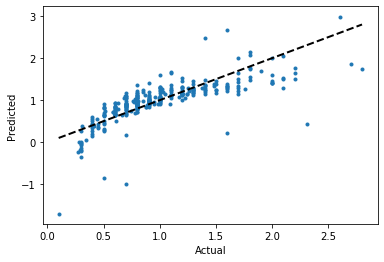

In [7]:
def plot_pred_actual(y_test, prediction):
    fig, ax = plt.subplots()
    ax.scatter(y_test, prediction, marker = ".")
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    plt.show()

plot_pred_actual(y_test, prediction)


# Observation :

Our plot is near to the 45 degree line indicating our model is good. Also, there are some points too far from the line, which may be a result of outliers, or may be non-linear sepearabiity of our data.


You have implemented simple linear regression. You may apply regularization techniques that constrain the coefficients. We will be seeing 2 types of regularized regression techniques:


1.   Ridge Regression
2.   Lasso Regression



# Ridge Regression

---

Describe the arguments and output of the Ridge regression function call in sklearn package.



---
### Parameters :
  
* alpha 
    > Regularization strength; must be a positive float. Regularization improves the conditioning of the problem and reduces the variance of the estimates. Larger values specify stronger regularization. Default Value is 1.0 
    
* fit_intercept  

    > This parameters determines whether to calculate the intercept for this model or not. The default value of fit_intercept is 'True'. When the data is centered, we do not need to calculate the intercept.

* normalize
    > The  default value of this parameter is false. When set to true, it will normalize the features by subtracting the mean and dividing by l2-norm.  
    Note : This parameter is ignored when fit intercept is set t

* copy_X   
    > If set to true, X will be copied, else it may get overwritten. Default : True
    

* max_iter
    > Maximum number of iterations for conjugate gradient solver. It depends upon the solver used.
    
* tol
    >Precision of the solution. Defualt valuse us 10 ^ -3

* random_state
    > The seed of the pseudo random number generator to use when shuffling the data.

* solver
    > Solver to use in the computational routines:
    
    
### Functions 
* fit ( X , y , sample_weight )  

    Fits the linear model.   
        
        * X: Training data , i.e. N X M matrix consisting of N training Samples and M features
        * Y : N dimensional vector consisting of target values.
        * Sample Weight : Individuals weights for each sample (Optional)
        
* get_params :  

    Get the parameters of the estimator. Returns a key value pairs, where key being the parameters name. 
    
        * deep : default = True.  
    
    
* Predict :  
    Predict using the model trained. Returns an array of predicted values.
    
        * X : Input data for prediction, i.e. N X M matrix consisting of N training Samples and M features

* score ( X , y , sample_weight)  
    Returns the coefficient of determination of R^2 prediction.
        * X : Test Samples for evaluation, i.e. N X M matrix consisting of N training Samples and M features. 
        * y : Actual values for X.
        * sample_weights : Individuals weights for each sample (Optional)
        
* set_params ()  
        Input is a dictionary conating the key value pairs. Returns the estimator instance after setting the parameter


---




In [0]:
def plot_error(mean_error, x_axis_values ,xlabel, ylabel, title):
    fig = plt.figure()
    ax=fig.add_subplot(111)
    plt.title( title , fontsize=18)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    ax.plot(x_axis_values, mean_error , marker = "o" , label="Error")
    plt.legend(loc='best')
    plt.show()    
    # insert your 





In ridge regression, L-2 regularization is applied to the coefficients. You have a hyperparameter alpha which you can vary to control the extent of constraining the coefficients. We would like you to experiment with different values of alpha and comment on the model performance. You may use the best setting of Linear Regression to Ridge Regression also. **Comment** on the effect of the alpha value on the mean squared error.


---

**9 Points**


---



[0.14151336543221862, 0.1669188605681695, 0.17860175315318016, 0.19485202440874783, 0.2056186680092831, 0.21072695039733677, 0.2137519873521327, 0.21576169759697325, 0.21719669930137828, 0.21827377658159033, 0.21911247692764804]


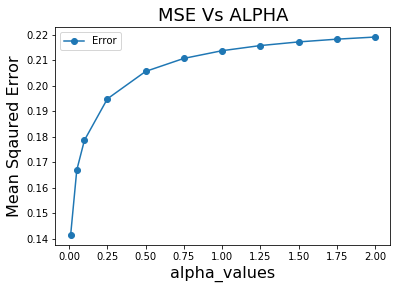

In [9]:

alpha_values = [0.01,0.05,0.1,0.25,0.5,0.75,1,1.25,1.5,1.75,2]
error_list = []

# Step 1: Split into train and test set based on the best fraction

X_train, X_test, y_train, y_test = train_test_split( input_features, target, test_size= best_fraction, random_state = 42)
pred = []
for alpha_ in alpha_values:
    

    # Step 2: Create a Ridge regressor object with desired alpha value
    
    regressor = Ridge(alpha = alpha_)

    # Step 3(a): Train the Ridge Regression model using training set
    
    regressor.fit(X_train, y_train)
    

    # Step 3(b): Predict the target values using the trained Ridge model for test set instances
    
    prediction_ridge = regressor.predict(X_test)
    pred =prediction_ridge

    # Step 3(c): Print the mean squared error of the model on test set. Add it to an error list to plot later.
    
    mse_error = mean_squared_error(y_test, prediction_ridge)
    error_list.append(mse_error)


# Step 4: Plot a graph of different alpha values of ridge regression versus mean squared error

print(error_list)
plot_error(error_list, alpha_values, "alpha_values" , "Mean Sqaured Error", 'MSE Vs ALPHA')


# Observation 

As we increase the parameter alpha, our error increases. Because as we increase our alpha the strength of the model to fit complex data decreases (but generalistion incrases). In our case, Stronger model was required for the fitting, and weaker model could not capture the complexity of the data.  Thats  why the mse was increasing

# Lasso Regression

---

Describe the arguments and output of the Ridge regression function call in sklearn package.



---
# LASSO
### Parameters :
  
* alpha 
    > Constant that multiplies the L1 term. Defaults to 1.0. alpha = 0 is equivalent to an ordinary least square, solved by linear regression techinque. Default Value is 0 
    
* fit_intercept  

    > This parameters determines whether to calculate the intercept for this model or not. The default value of fit_intercept is 'True'. When the data is centered, we do not need to calculate the intercept.

* normalize
    > The  default value of this parameter is false. When set to true, it will normalize the features by subtracting the mean and dividing by l2-norm.  
    Note : This parameter is ignored when fit intercept is set t

*

* copy_X   
    > If set to true, X will be copied, else it may get overwritten. Default : True
    

* n_jobs  
    > The number of CPU's to use for computation. Default value being "None" indicates the use of only one CPU core, and -1 means use all the processors.
    
* max_iter
    > Maximum number of iterations for conjugate gradient solver. It depends upon the solver used.
    
* tol
    >Precision of the solution. Defualt valuse us 10 ^ -3

* random_state
    > The seed of the pseudo random number generator to use when shuffling the data.

* solver
    > Solver to use in the computational routines:
    
    
### Functions 
* fit ( X , y , sample_weight )  

    Fits the linear model.   
        
        * X: Training data , i.e. N X M matrix consisting of N training Samples and M features
        * Y : N dimensional vector consisting of target values.
        * Sample Weight : Individuals weights for each sample (Optional)
        
* get_params :  

    Get the parameters of the estimator. Returns a key value pairs, where key being the parameters name. 
    
        * deep : default = True.  
    
    
* Predict :  
    Predict using the model trained. Returns an array of predicted values.
    
        * X : Input data for prediction, i.e. N X M matrix consisting of N training Samples and M features

* score ( X , y , sample_weight)  
    Returns the coefficient of determination of R^2 prediction.
        * X : Test Samples for evaluation, i.e. N X M matrix consisting of N training Samples and M features. 
        * y : Actual values for X.
        * sample_weights : Individuals weights for each sample (Optional)
        
* set_params ()  
        Input is a dictionary conating the key value pairs. Returns the estimator instance after setting the parameter


---




In Lasso regression, L-1 regularization is applied to the coefficients. You have a hyperparameter alpha which you can vary to control the extent of constraining the coefficients. We would like you to experiment with different values of alpha and **comment** on the model performance. You may use the best setting of Linear Regression to Lasso Regression also.

---

**9 Points**

---



[0.22589302532218816, 0.22589302532218816, 0.22589302532218816, 0.22589302532218816, 0.22589302532218816, 0.22589302532218816, 0.22589302532218816, 0.22589302532218816, 0.22589302532218816, 0.22589302532218816, 0.22589302532218816]


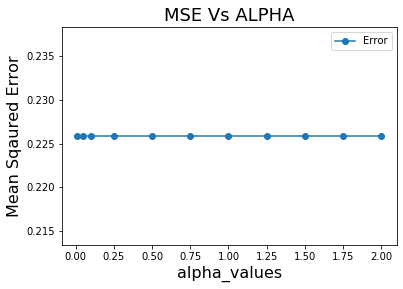

In [10]:
from sklearn import linear_model

alpha_values = [0.01,0.05,0.1,0.25,0.5,0.75,1,1.25,1.5,1.75,2]
error_list = []

# Step 1: Split into train and test set based on the best fraction

X_train, X_test, y_train, y_test = train_test_split( input_features, target, test_size= best_fraction, random_state = 42)

for alpha_ in alpha_values:

    # Step 2: Create a LASSO regressor object with desired alpha value
    
    regressor = Lasso(alpha= alpha_)
    
    
    # Step 3(a): Train the LASSO Regression model using training set
    
    regressor.fit(X_train, y_train)
    

    # Step 3(b): Predict the target values using the trained LASSO model for test set instances
    
    prediction_lasso = regressor.predict(X_test)

    # Step 3(c): Print the mean squared error of the model on test set. Add it to an error list to plot later.
    
    mse_error = mean_squared_error(y_test, prediction_lasso)
    error_list.append(mse_error)


# Step 4: Plot a graph of different alpha values of lasso regression versus mean squared error


print(error_list)
plot_error(error_list, alpha_values, "alpha_values" , "Mean Sqaured Error", 'MSE Vs ALPHA')

# Observation 

Increasing the alpha has almost no effect on the MSE. This implies the weights learned by model is tending to zero, so the term alpha * ||w|| ^ 1 can be neglected. This neglecting of the later term is resulting in the same model for each alpha values.

Now since you have tried LASSO with different alpha values, you may try different number of maximum iterations associated with LASSO and **comment** on its effect on the mean squared error.


---

**9 Points**

---



[0.22589302532218816, 0.22589302532218816, 0.22589302532218816, 0.22589302532218816, 0.22589302532218816, 0.22589302532218816, 0.22589302532218816, 0.22589302532218816, 0.22589302532218816, 0.22589302532218816, 0.22589302532218816, 0.22589302532218816, 0.22589302532218816, 0.22589302532218816, 0.22589302532218816, 0.22589302532218816, 0.22589302532218816, 0.22589302532218816, 0.22589302532218816, 0.22589302532218816, 0.22589302532218816, 0.22589302532218816, 0.22589302532218816, 0.22589302532218816, 0.22589302532218816, 0.22589302532218816, 0.22589302532218816, 0.22589302532218816, 0.22589302532218816, 0.22589302532218816, 0.22589302532218816, 0.22589302532218816, 0.22589302532218816, 0.22589302532218816, 0.22589302532218816, 0.22589302532218816, 0.22589302532218816, 0.22589302532218816, 0.22589302532218816, 0.22589302532218816, 0.22589302532218816, 0.22589302532218816, 0.22589302532218816, 0.22589302532218816, 0.22589302532218816, 0.22589302532218816, 0.22589302532218816, 0.2258930253

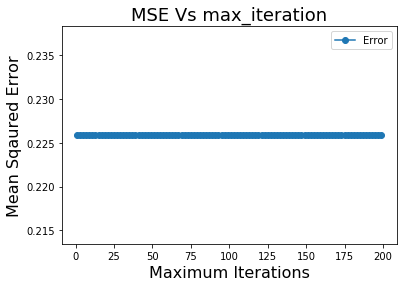

In [11]:

# Step 1: Split into train and test set based on the best fraction
 
X_train, X_test, y_train, y_test = train_test_split( input_features, target, test_size= best_fraction, random_state = 42)
error_list= []
for m_iterations in range(1,200,2):

    

    # Step 2: Create a LASSO regressor object with desired number of iterations
     
    regressor = Lasso(alpha = 0.01, max_iter = m_iterations)
    
    

    # Step 3(a): Train the LASSO Regression model using training set
     
    regressor.fit(X_train, y_train)

    # Step 3(b): Predict the target values using the trained LASSO model for test set instances
     
    prediction_lasso = regressor.predict(X_test)
    
    
    # Step 3(c): Print the mean squared error of the model on test set. Add it to an error list to plot later.
     
    mse_error = mean_squared_error(y_test, prediction_lasso)
    error_list.append(mse_error)
    


# Step 4: Plot a graph of different alpha values of lasso regression versus mean squared error


print(error_list)
m_iter_list = list(range(1,200,2))
plot_error(error_list, m_iter_list, "Maximum Iterations" , "Mean Sqaured Error", 'MSE Vs max_iteration')

# Obseevation 
Our MSE remains the same on increasing maximum iteration count. This indicates that the gradients obtained is tending to zero, causing nearly no change in model's weights (in the update equation) on further iterations.